In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [3]:
df=pd.read_csv(r'C:\Users\vs390\OneDrive\Desktop\customer_segmentation_projects\Data\customer_segment_data.csv')
df.head(5)


,Customer_ID,Age,Gender,Occupation,Income_Bracket,Family_Size,Marital_Status,Education_Level,Region,Monthly_Revenue,...,Last_Interaction_Days,Number_of_Complaints,Payment_Method,Bill_Payment_Timeliness,Outstanding_Balance,Loyalty_Points,Campaign_Responses,Social_Media_Activity,Network_Complaints,Service_Downtime_Impact
0,CUST_00001,29,Male,Student,<$50K,1,Divorced,PhD,West,422.391081,...,256,1,UPI,Late by >5 Days,268.126534,648,0,High,5,High
1,CUST_00002,39,Male,Student,>$100K,5,Married,PhD,West,278.674350,...,325,9,Debit Card,Late by >5 Days,275.718834,693,5,Moderate,7,Low
2,CUST_00003,39,Female,Professional,$50K–$100K,4,Married,Bachelor’s,West,669.848562,...,188,9,Debit Card,Late by >5 Days,182.159068,642,2,Low,1,High
3,CUST_00004,29,Female,Professional,<$50K,3,Married,Bachelor’s,East,223.073176,...,186,3,Credit Card,Late by <5 Days,146.421803,525,0,Moderate,6,High
4,CUST_00005,40,Female,Professional,<$50K,3,Single,Bachelor’s,West,866.153758,...,149,4,Net Banking,Late by <5 Days,94.528694,775,5,Low,8,Low


In [4]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Occupation', 'Income_Bracket',
       'Family_Size', 'Marital_Status', 'Education_Level', 'Region',
       'Monthly_Revenue', 'CLTV', 'Avg_Monthly_Data_Usage_GB',
       'Avg_Call_Duration_Minutes', 'Monthly_Transactions', 'Churn_Status',
       'Subscription_Type', 'Retention_Offers_Availed', 'Feedback_Score',
       'Preferred_Product_Type', 'Peak_Usage_Time', 'Last_Interaction_Days',
       'Number_of_Complaints', 'Payment_Method', 'Bill_Payment_Timeliness',
       'Outstanding_Balance', 'Loyalty_Points', 'Campaign_Responses',
       'Social_Media_Activity', 'Network_Complaints',
       'Service_Downtime_Impact'],
      dtype='object')

In [5]:
features=df[['Age','Monthly_Revenue','Avg_Monthly_Data_Usage_GB','CLTV','Feedback_Score']]
features.head(4)

,Age,Monthly_Revenue,Avg_Monthly_Data_Usage_GB,CLTV,Feedback_Score
0,29,422.391081,62.953681,3707.260729,10
1,39,278.674350,10.556741,7492.449343,6
2,39,669.848562,188.540155,18259.375954,7
3,29,223.073176,144.701083,7024.336443,10


In [6]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)

pd.DataFrame(scaled_features,columns=features.columns).head(3)

,Age,Monthly_Revenue,Avg_Monthly_Data_Usage_GB,CLTV,Feedback_Score
0,-0.853293,-0.399919,-0.670548,-1.217856,1.523250
1,-0.125848,-0.943870,-1.566624,-0.544271,0.135323
2,-0.125848,0.536679,1.477191,1.371732,0.482305


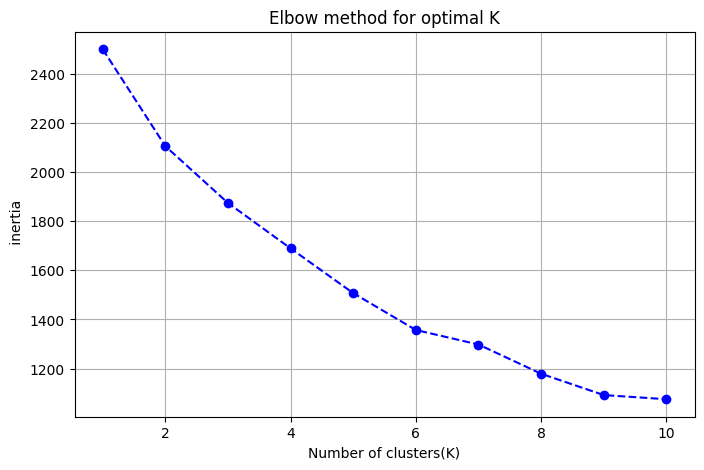

In [7]:
inertia=[]
k_range=range(1,11)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)



   
plt.figure(figsize=(8,5))
plt.plot(k_range,inertia,marker='o',linestyle='--',color='b')
plt.title('Elbow method for optimal K')
plt.xlabel('Number of clusters(K)')
plt.ylabel(" inertia")
plt.grid()
plt.show()
    
    
  

In [8]:
optimal_k=3
kmeans=KMeans(n_clusters=optimal_k,random_state=42)
df['Segment']=kmeans.fit_predict(scaled_features)

segment_labels={0:'High=value',1:'Mid-value',2:'Low-value'}
df['Segment']=df['Segment'].map(segment_labels)
df[['Customer_ID','Segment']].head(3)


,Customer_ID,Segment
0,CUST_00001,High=value
1,CUST_00002,High=value
2,CUST_00003,Mid-value


In [9]:
segment_analysis=df.groupby('Segment').value_counts()
segment_analysis

Segment     Customer_ID  Age  Gender  Occupation    Income_Bracket  Family_Size  Marital_Status  Education_Level  Region  Monthly_Revenue  CLTV          Avg_Monthly_Data_Usage_GB  Avg_Call_Duration_Minutes  Monthly_Transactions  Churn_Status  Subscription_Type  Retention_Offers_Availed  Feedback_Score  Preferred_Product_Type  Peak_Usage_Time  Last_Interaction_Days  Number_of_Complaints  Payment_Method  Bill_Payment_Timeliness  Outstanding_Balance  Loyalty_Points  Campaign_Responses  Social_Media_Activity  Network_Complaints  Service_Downtime_Impact
High=value  CUST_00001   29   Male    Student       <$50K           1            Divorced        PhD              West    422.391081       3707.260729   62.953681                  16.767502                  39                    Yes           Corporate Plan     3                         10              Voice Plan              Afternoon        256                    1                     UPI             Late by >5 Days          268.126534    

In [10]:
metrics=['Monthly_Revenue','CLTV','Churn_Status','Feedback_Score']
comparison=df.groupby('Segment')[metrics].value_counts()
comparison


Segment     Monthly_Revenue  CLTV          Churn_Status  Feedback_Score
High=value  57.186890        4771.238327   No            8                 1
            57.712998        12113.398356  No            6                 1
            65.475318        10430.095530  No            7                 1
            69.264754        8831.185345   No            10                1
            72.560845        11364.144202  No            9                 1
                                                                          ..
Mid-value   968.156551       12715.207567  No            5                 1
            968.792204       19708.332177  No            3                 1
            988.251721       15055.652729  No            10                1
            989.608046       12790.063278  No            8                 1
            999.667762       17810.753154  No            8                 1
Name: count, Length: 500, dtype: int64

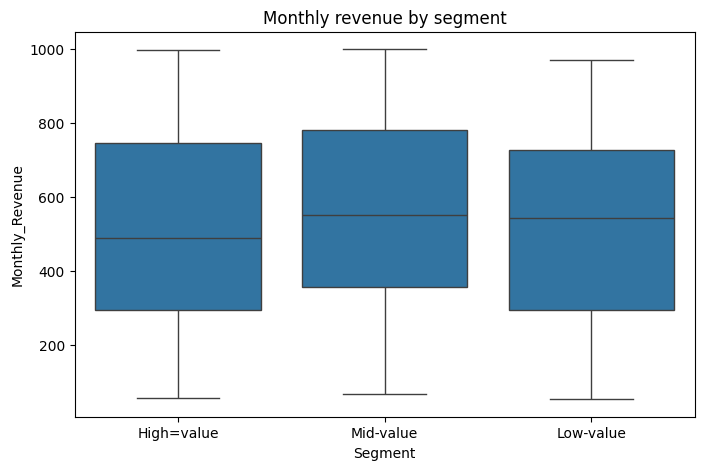

In [11]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='Segment',y='Monthly_Revenue')
plt.title('Monthly revenue by segment')
plt.show()

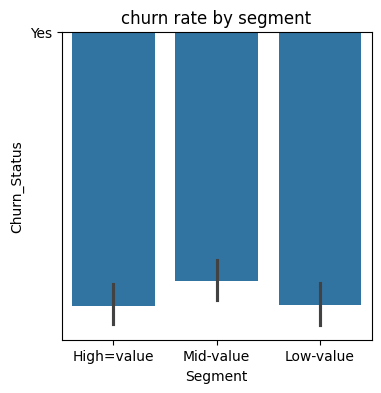

In [12]:
plt.figure(figsize=(4,4))
sns.barplot(data=df,x='Segment',y='Churn_Status')
plt.title('churn rate by segment')
plt.show()

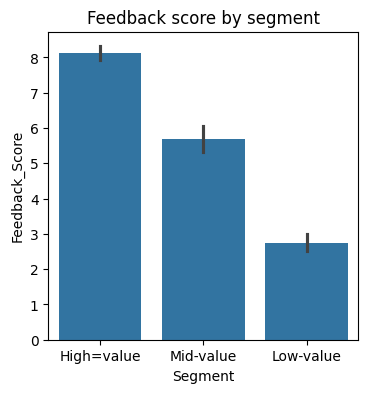

In [13]:
plt.figure(figsize=(4,4))
sns.barplot(data=df,x='Segment',y='Feedback_Score')
plt.title('Feedback score by segment')
plt.show()

In [15]:
df.to_csv(r'C:\Users\vs390\OneDrive\Desktop\customer_segmentation_projects\Data/segment_output.csv',index=False)